In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from dengai import data_util
from xgboost import XGBRegressor

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import xgboost as xgb

In [3]:
# Get Training Data for San Juan and Iquitos
sj, iq = data_util.get_train_feature_label()

# Split Data into features and labels
sj_features = sj.drop(["total_cases"], axis=1)
sj_labels = sj[["total_cases"]]

iq_features = iq.drop(["total_cases"], axis=1)
iq_labels = iq[["total_cases"]]


In [33]:
# Get Testing Data for San Juan and Iquitos
sj_test_features = data_util.preprocess_data(isTest=True, isSJ=True)
iq_test_features = data_util.preprocess_data(isTest=True, isSJ=False)

/Users/Angus/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


San Juan Prediction
---

In [7]:
sj_cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3]}
sj_ind_params = {'learning_rate': 0.1, 'n_estimators': 200, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'count:poisson'}
sj_optimized_GBM = GridSearchCV(xgb.XGBClassifier(**sj_ind_params), 
                             sj_cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

In [8]:
row = sj_labels.values.shape[0]
sj_labels = sj_labels.values.reshape(row,)

In [9]:
sj_labels.shape
#What is the difference between (933,) and (933,1)

(933,)

In [7]:
sj_optimized_GBM.fit(sj_features, sj_labels)

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='count:poisson', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [8]:
sj_optimized_GBM.grid_scores_

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -26.95606, std: 12.79975, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: -25.78778, std: 13.81872, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: -27.24866, std: 12.00586, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -25.84995, std: 13.98478, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -27.54770, std: 12.17846, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -25.79957, std: 13.85016, params: {'max_depth': 7, 'min_child_weight': 3}]

In [11]:
sj_cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.6,0.8]}
sj_ind_params = {'n_estimators': 200, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'count:poisson', 'max_depth':3, 'min_child_weight':3}
sj_optimized_GBM = GridSearchCV(xgb.XGBClassifier(**sj_ind_params), 
                             sj_cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

In [12]:
sj_optimized_GBM.fit(sj_features, sj_labels)

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=200, nthread=-1,
       objective='count:poisson', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [17]:
sj_optimized_GBM.grid_scores_

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -26.95606, std: 12.79975, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: -25.78778, std: 13.81872, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: -27.24866, std: 12.00586, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -25.84995, std: 13.98478, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -27.54770, std: 12.17846, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -25.79957, std: 13.85016, params: {'max_depth': 7, 'min_child_weight': 3}]

In [13]:
sj_params = {'eta':0.1, 'seed':0, 'subsample': 0.6, 'colsample_bytree': 0.6, 
              'objective': 'count:poisson', 'max_depth':3, 'min_child_weight':3}

sj_xgdmat = xgb.DMatrix(sj_features, sj_labels)

iq_cv_xgb = xgb.cv(params = sj_params, dtrain = sj_xgdmat, num_boost_round = 1000, nfold = 5,
                metrics = ['mae'], early_stopping_rounds = 100)

In [14]:
iq_cv_xgb.tail(5)

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
58,23.484556,2.519810,22.999518,0.612721
59,23.427437,2.477928,22.890891,0.603635
60,23.334251,2.450471,22.803264,0.594927
61,23.314936,2.448203,22.727707,0.594223
62,23.290293,2.398299,22.672151,0.592834


In [15]:
sj_final_gb = xgb.train(sj_params, sj_xgdmat, num_boost_round = 65)

In [23]:
pred_sj_train = xgb.DMatrix(sj_features)
pred_sj = sj_final_gb.predict(pred_sj_train)

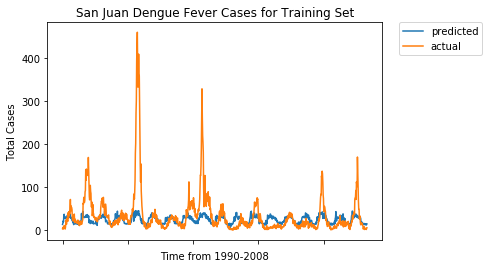

In [49]:
#SJ predicted vs actual on Training Set
fig1, ax1 = plt.subplots()
plt.plot(pred_sj, label='predicted')
plt.plot(sj_labels, label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Time from 1990-2008")
plt.ylabel("Total Cases")
plt.title("San Juan Dengue Fever Cases for Training Set")
ax1.set_xticklabels([])
plt.show()


San Juan Final Predictions 
----

In [22]:
sj_test_features_matrix = xgb.DMatrix(sj_test_features)
pred_sj_test = final_gb.predict(sj_test_features_matrix)

Iquitos Prediction
---

In [27]:
iq_cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3]}
iq_ind_params = {'n_estimators': 200, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'count:poisson', 'learning_rate': 0.1, 'subsample': 0.6}
iq_optimized_GBM = GridSearchCV(xgb.XGBClassifier(**iq_ind_params), 
                             iq_cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

In [28]:
row = iq_labels.values.shape[0]
iq_labels = iq_labels.values.reshape(row,)

In [33]:
iq_optimized_GBM.fit(iq_features, iq_labels)

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='count:poisson', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [34]:
iq_optimized_GBM.grid_scores_

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -6.74081, std: 2.29201, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: -6.45648, std: 2.36701, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: -6.69632, std: 1.93552, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: -6.36170, std: 2.31364, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: -6.72534, std: 1.95799, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: -6.37524, std: 2.27294, params: {'max_depth': 7, 'min_child_weight': 3}]

In [35]:
iq_cv_params = {'learning_rate': [0.1, 0.01, 0.01], 'subsample': [0.6,0.8]}
iq_ind_params = {'n_estimators': 200, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'count:poisson', 'max_depth':3, 'min_child_weight':3}
iq_optimized_GBM = GridSearchCV(xgb.XGBClassifier(**iq_ind_params), 
                             iq_cv_params, 
                             scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)

In [42]:
iq_optimized_GBM.fit(iq_features, iq_labels)

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='count:poisson', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.6),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [39]:
iq_optimized_GBM.grid_scores_

/Users/Angus/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -6.45648, std: 2.36701, params: {'learning_rate': 0.1, 'subsample': 0.6},
 mean: -6.48356, std: 2.28085, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: -6.53578, std: 2.47292, params: {'learning_rate': 0.01, 'subsample': 0.6},
 mean: -6.49710, std: 2.45501, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: -6.53578, std: 2.47292, params: {'learning_rate': 0.01, 'subsample': 0.6},
 mean: -6.49710, std: 2.45501, params: {'learning_rate': 0.01, 'subsample': 0.8}]

In [53]:
iq_params = {'eta':0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
              'objective': 'count:poisson', 'max_depth':3, 'min_child_weight':1}

iq_xgdmat = xgb.DMatrix(iq_features, iq_labels)

iq_cv_xgb = xgb.cv(params = iq_params, dtrain = iq_xgdmat, num_boost_round = 1000, nfold = 5,
                metrics = ['mae'], early_stopping_rounds = 100)

In [54]:
iq_cv_xgb.tail(5)

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
33,5.862708,1.102655,5.662438,0.273650
34,5.848453,1.107822,5.622395,0.276744
35,5.834436,1.110518,5.585000,0.273161
36,5.825693,1.112737,5.552984,0.274701
37,5.817235,1.112992,5.527597,0.276930


In [55]:
iq_final_gb = xgb.train(iq_params, iq_xgdmat, num_boost_round = 46)

In [58]:
pred_iq_train = xgb.DMatrix(iq_features)
pred_iq = iq_final_gb.predict(pred_iq_train)

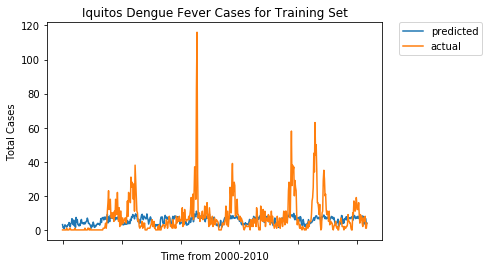

In [59]:
#IQ predicted vs actual
fig1, ax1 = plt.subplots()
plt.plot(pred_iq, label='predicted')
plt.plot(iq_labels, label='actual')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Time from 2000-2010")
plt.ylabel("Total Cases")
plt.title("Iquitos Dengue Fever Cases for Training Set")
ax1.set_xticklabels([])
plt.show()

Iquitos Final Predictions 
----

In [47]:
iq_test_features_matrix = xgb.DMatrix(iq_test_features)
pred_iq_test = iq_final_gb.predict(iq_test_features_matrix)

Final Predictions
---

In [61]:
data_util.write_submission_file(pred_sj_test, pred_iq_test, write_to="data/submit_xgb.csv")

Should enter 416 predictions
Entered 416 predictions
